In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_excel(r'../dataset/rollingsales_bronx.xls', skiprows=4)

df = pd.concat([pd.read_excel(f"../dataset/{file}", skiprows=4) for file in ["rollingsales_bronx.xls", "rollingsales_brooklyn.xls", "rollingsales_manhattan.xls", "rollingsales_queens.xls", "rollingsales_statenisland.xls"]], ignore_index=True)

In [3]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85970,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
85971,5,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,33 QUAIL LANE,,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
85972,5,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,40 HERRICK AVENUE,,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
85973,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


По-перше, видаляємо дуплікати.

In [4]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83848,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
83849,5,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,33 QUAIL LANE,,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
83850,5,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,40 HERRICK AVENUE,,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
83851,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


Відформатуємо назву стовпчиків SALE PRICE, EASEMENT, APARTMENT NUMBER.

In [5]:
df.rename(columns={'SALE\nPRICE': 'SALE PRICE', 'EASE-MENT': 'EASEMENT', 'APART\nMENT\nNUMBER': 'APARTMENT NUMBER'}, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83848,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
83849,5,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,33 QUAIL LANE,,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
83850,5,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,40 HERRICK AVENUE,,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
83851,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


Переглянемо, який вигляд має наразі датасет.

In [6]:
df.head(60)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
5,2,BATHGATE,02 TWO FAMILY HOMES,1,2912,158,,B1,505 EAST 171ST STREET,,...,2,0,2,2000,2400,1993,1,B1,316500,2012-12-27
6,2,BATHGATE,02 TWO FAMILY HOMES,1,2929,117,,B1,3860 3 AVENUE,,...,2,0,2,2498,2394,1995,1,B1,390000,2013-06-24
7,2,BATHGATE,02 TWO FAMILY HOMES,1,3030,60,,B3,4469 PARK AVENUE,,...,2,0,2,1542,1542,1899,1,B3,207000,2013-06-27
8,2,BATHGATE,02 TWO FAMILY HOMES,1,3035,27,,B1,454 EAST 179 STREET,,...,2,0,2,1819,2340,1998,1,B1,0,2013-07-01
9,2,BATHGATE,02 TWO FAMILY HOMES,1,3039,65,,B2,465 EAST 185 STREET,,...,2,0,2,1667,1296,1910,1,B2,369000,2013-03-07


Форматування адреси різниться між записами. В деяких рядках є кома, після якої вказаний номер будинку. Розділимо стовпчик адреси на назву вулиці та номер будинку.

In [7]:
df['ADDRESS'].str.split(',',1,expand=True)

,0,1
0,412 EAST 179TH STREET,None
1,2329 WASHINGTON AVENUE,None
2,2075 BATHGATE AVENUE,None
3,2047 BATHGATE AVENUE,None
4,406 EAST TREMONT AVENUE,None
...,...,...
83848,63 PHEASANT LANE,None
83849,33 QUAIL LANE,None
83850,40 HERRICK AVENUE,None
83851,639 VETERANS ROAD WEST,None


In [8]:
df[['STREET ADDRESS', 'BUILDING ADDRESS']] = df['ADDRESS'].str.split(',',1,expand=True)
df = df.drop(columns='ADDRESS')
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,STREET ADDRESS,BUILDING ADDRESS
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,,10457,...,1,1842,2048,1901,1,A5,355000,2013-07-08,412 EAST 179TH STREET,None
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,,10458,...,1,1103,1290,1910,1,A1,474819,2013-05-20,2329 WASHINGTON AVENUE,None
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,,10457,...,1,1986,1344,1899,1,A1,210000,2013-03-12,2075 BATHGATE AVENUE,None
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,,10457,...,1,2329,1431,1901,1,A1,343116,2013-07-01,2047 BATHGATE AVENUE,None
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,,10457,...,3,1855,4452,1931,1,S2,0,2012-08-31,406 EAST TREMONT AVENUE,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83848,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,,10309,...,2,2590,2450,1998,1,B9,505000,2013-05-15,63 PHEASANT LANE,None
83849,5,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,,10309,...,2,2255,2377,1998,1,B9,0,2013-04-09,33 QUAIL LANE,None
83850,5,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,,10309,...,2,4000,2962,2000,1,B2,0,2012-08-01,40 HERRICK AVENUE,None
83851,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,,10309,...,1,21663,6950,2008,4,K6,1300000,2013-05-29,639 VETERANS ROAD WEST,None


<!-- Тепер звернемо увагу на стовпчики 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'. Якщо всі три стовпчики нульові, це означає, що інформація про них недоступна. Для вирішення цієї проблеми застосуємо метод fillna(). -->

Підрахуємо, скільки нульових значень має кожен стовпчик.

In [9]:
zero_counts_per_column = (df == 0).sum()
print(zero_counts_per_column)

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASEMENT                              0
BUILDING CLASS AT PRESENT             0
APARTMENT NUMBER                      0
ZIP CODE                             64
RESIDENTIAL UNITS                 29433
COMMERCIAL UNITS                  76101
TOTAL UNITS                       20314
LAND SQUARE FEET                  39518
GROSS SQUARE FEET                 41880
YEAR BUILT                        11113
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        27489
SALE DATE                             0
STREET ADDRESS                        0
BUILDING ADDRESS                      0
dtype: int64


Звернемо увагу на те, що значення 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE' дорівнюють 0 в деяких рядках. 

Оскільки доволі багато рядків мають нулі, ми їх так і залишимо, але ці нулі потрібно ігнорувати під час обчислення будь-якого статистичного значення або побудови графіка розподілу.

Для 'ZIP CODE' заповнимо два нульових значення значеннями відповідних попередніх рядків.

In [10]:
df['ZIP CODE'].replace(0, np.nan, inplace=True)
df['ZIP CODE'].fillna(method='ffill', inplace=True)
df['ZIP CODE'] = df['ZIP CODE'].astype('int64')

Перевіримо формати значень:

In [11]:
print(df.dtypes)

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASEMENT                                  object
BUILDING CLASS AT PRESENT                 object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                 object
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE                         datetime64[ns]
STREET ADDRESS      

In [12]:
df = df.reset_index(drop=True)

df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,STREET ADDRESS,BUILDING ADDRESS
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,,10457,...,1,1842,2048,1901,1,A5,355000,2013-07-08,412 EAST 179TH STREET,None
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,,10458,...,1,1103,1290,1910,1,A1,474819,2013-05-20,2329 WASHINGTON AVENUE,None
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,,10457,...,1,1986,1344,1899,1,A1,210000,2013-03-12,2075 BATHGATE AVENUE,None
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,,10457,...,1,2329,1431,1901,1,A1,343116,2013-07-01,2047 BATHGATE AVENUE,None
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,,10457,...,3,1855,4452,1931,1,S2,0,2012-08-31,406 EAST TREMONT AVENUE,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83848,5,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,,10309,...,2,2590,2450,1998,1,B9,505000,2013-05-15,63 PHEASANT LANE,None
83849,5,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,,10309,...,2,2255,2377,1998,1,B9,0,2013-04-09,33 QUAIL LANE,None
83850,5,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,,10309,...,2,4000,2962,2000,1,B2,0,2012-08-01,40 HERRICK AVENUE,None
83851,5,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,,10309,...,1,21663,6950,2008,4,K6,1300000,2013-05-29,639 VETERANS ROAD WEST,None


Бачимо, що дані відформатовані належним чином, а отже можна приступати до візуалізації.

Слід пам'ятати, що нульові значення в стовпчиках 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE' потрібно ігнорувати.

Задля спрощення візуалізації даних додаємо меппінг номеру та самої назви кожного району Нью-Йорку

In [13]:
borough_mapping = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

df['BOROUGH_NAME'] = df['BOROUGH'].map(borough_mapping)

Візуалізуємо середню ціну нерухомості за районом (median) 

In [14]:
min_sale_date = df['SALE DATE'].min()
print("Minimum sale date:", min_sale_date)

max_sale_date = df['SALE DATE'].max()
print("Maximum sale date:", max_sale_date)

Minimum sale date: 2012-08-01 00:00:00
Maximum sale date: 2013-08-26 00:00:00


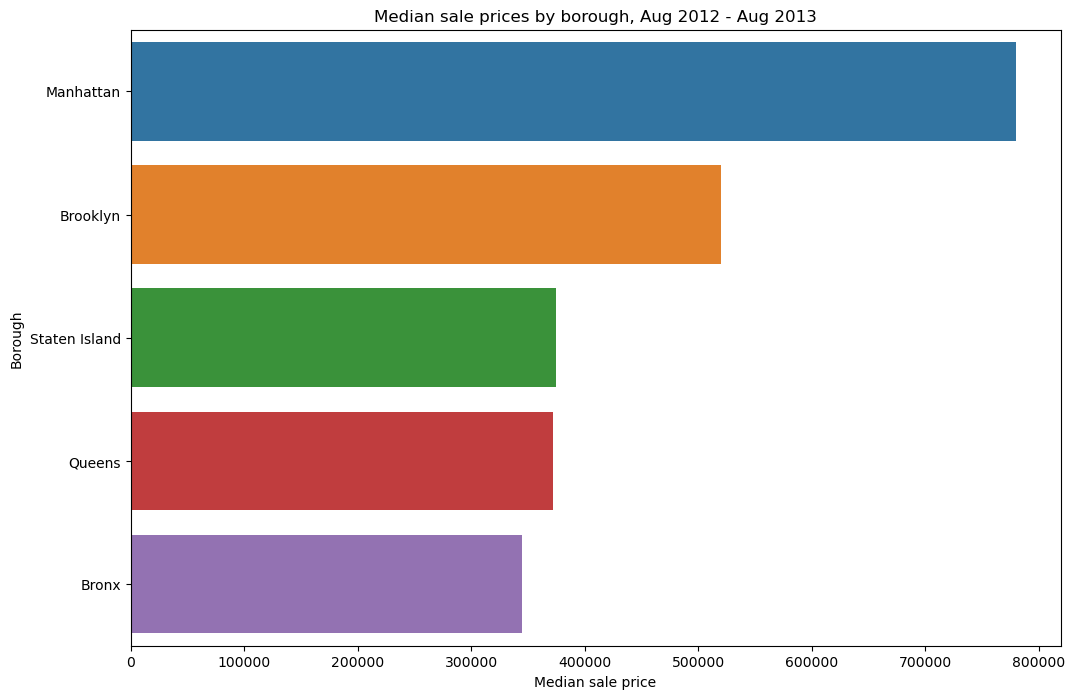

In [15]:
df = df[df['SALE PRICE'] > 0]

median_prices = df.groupby('BOROUGH_NAME')['SALE PRICE'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='SALE PRICE', y='BOROUGH_NAME', data=df, ci=None, estimator=np.median, order=median_prices)
plt.xlabel('Median sale price')
plt.ylabel('Borough')
plt.title('Median sale prices by borough, Aug 2012 - Aug 2013')
plt.show()

Візуалізуємо також дані про середню ціну нерухомості за часом та районами.

/var/folders/x1/cztztyr116j58cftklwt4t540000gn/T/ipykernel_76225/2593117774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE MONTH'] = df['SALE DATE'].dt.strftime('%b %Y')


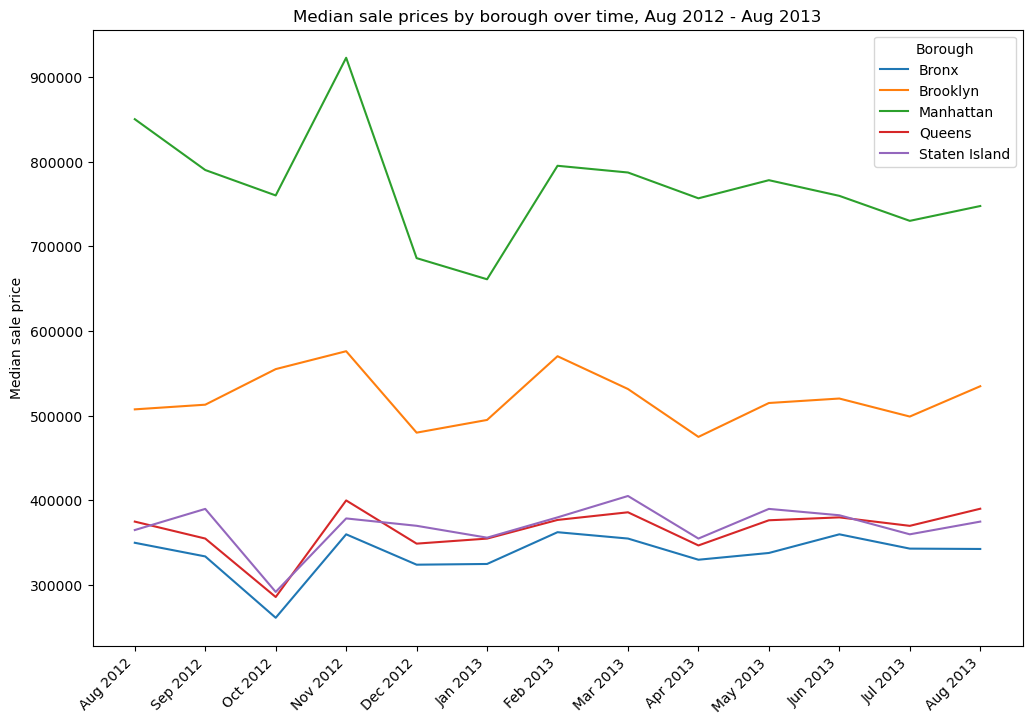

In [16]:
df['SALE MONTH'] = df['SALE DATE'].dt.strftime('%b %Y')
median_prices_by_month = df.groupby(['BOROUGH_NAME', 'SALE MONTH'])['SALE PRICE'].median().reset_index()
month_order = sorted(df['SALE DATE'].dt.strftime('%b %Y').unique(), key=lambda x: pd.to_datetime(x))
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='SALE MONTH', y='SALE PRICE', hue='BOROUGH_NAME', data=median_prices_by_month, hue_order=df['BOROUGH_NAME'].unique(), sort=False)
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45, ha='right')

plt.xlabel('')
plt.ylabel('Median sale price')
plt.title('Median sale prices by borough over time, Aug 2012 - Aug 2013')
plt.legend(title='Borough')
plt.show()

Покажемо інформацію про дистрибуцію нерухомості за тим, коли вона була побудована

56364
50600


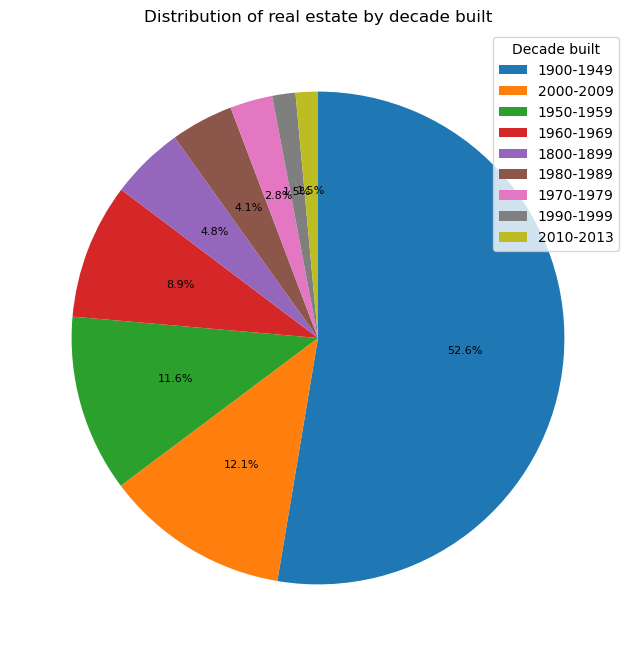

In [17]:
print(df.shape[0])

df = df[df['YEAR BUILT'] > 0]

print(df.shape[0])

decade_range = [1800, 1900, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2014]
legend_labels = ['1800-1899', '1900-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2013']

df['Decade Built'] = pd.cut(df['YEAR BUILT'], bins=decade_range, labels=legend_labels)
decade_built_counts = df['Decade Built'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(decade_built_counts, labels=None, autopct='%1.1f%%', startangle=90, counterclock=False, textprops=dict(fontsize=8))

plt.title('Distribution of real estate by decade built')
plt.legend(decade_built_counts.index, title='Decade built', loc='upper right')
plt.show()

Тепер покажемо інформацію про середню ціну нерухомості (median) за роком, коли вона була збудована, для кожного району.

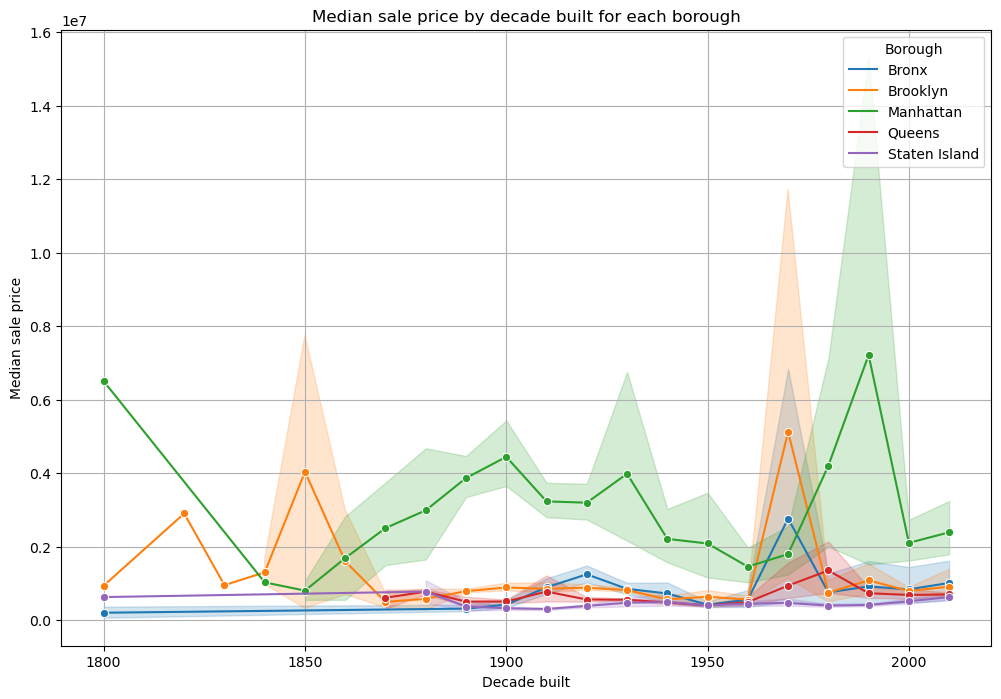

In [18]:
df['Decade Built'] = (df['YEAR BUILT'] // 10) * 10

plt.figure(figsize=(12, 8))
sns.lineplot(x='Decade Built', y='SALE PRICE', hue='BOROUGH_NAME', data=df, marker='o')
plt.title('Median sale price by decade built for each borough')
plt.xlabel('Decade built')
plt.ylabel('Median sale price')
plt.legend(title='Borough')
plt.grid(True)
plt.show()

Покажемо це відношення за допомогою scatter plot. Використовуємо log для обробки викидів.

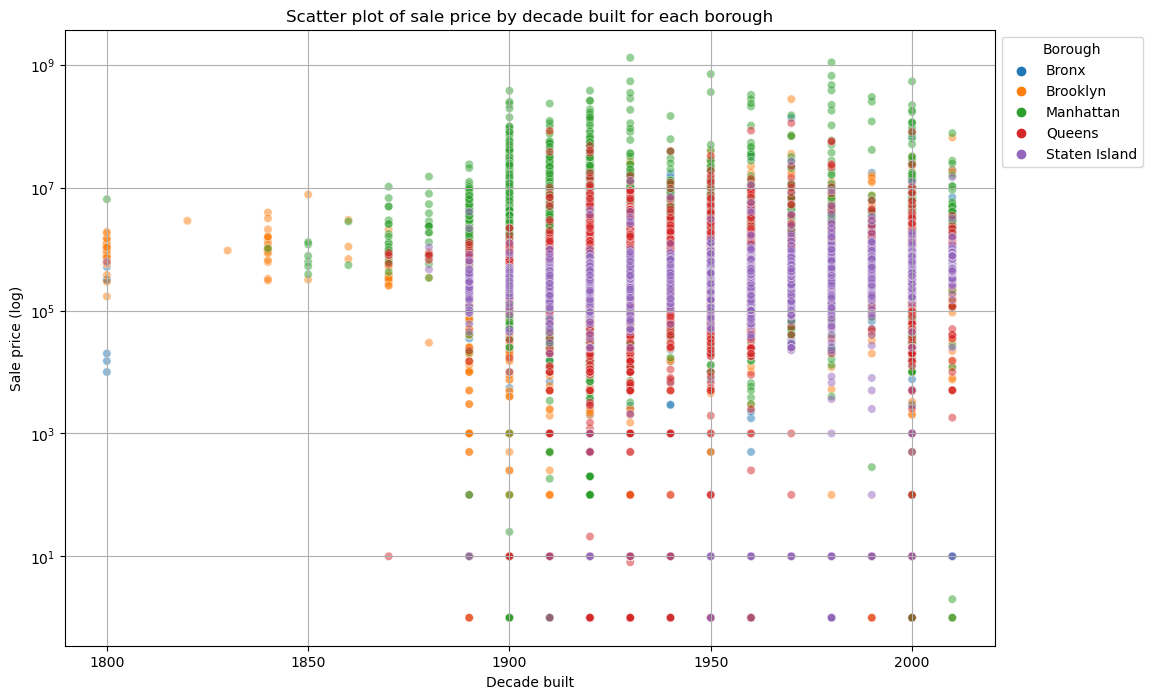

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Decade Built', y='SALE PRICE', hue='BOROUGH_NAME', data=df, alpha=0.5)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Scatter plot of sale price by decade built for each borough')
plt.xlabel('Decade built')
plt.ylabel('Sale price (log)')
plt.legend(title='Borough', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Візуалізуємо медіану ціни за типом нерухомості.

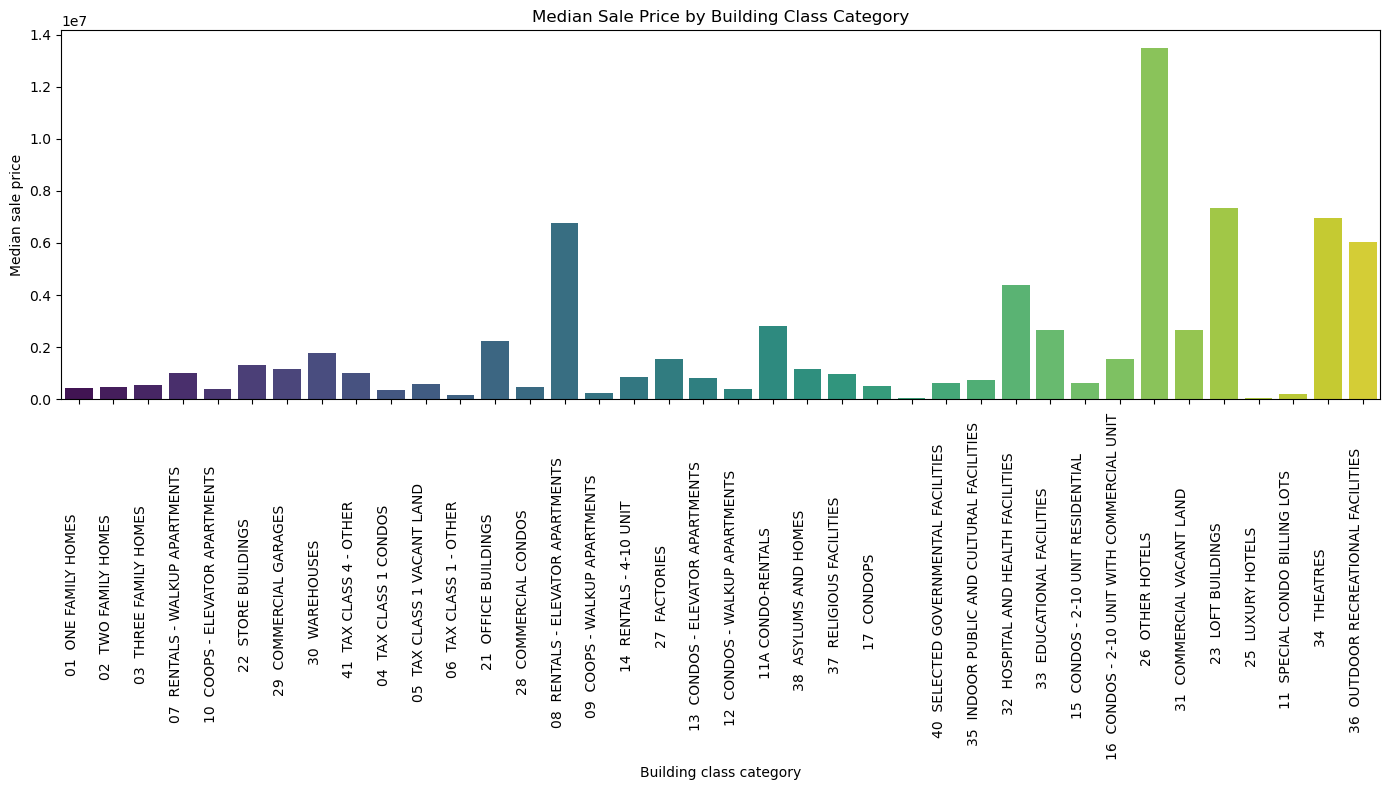

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df, estimator=np.median, ci=None, palette='viridis')
plt.title('Median Sale Price by Building Class Category')
plt.xlabel('Building class category')
plt.ylabel('Median sale price')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Покажемо також дистрибуцію типів нерухомості для кожного району.

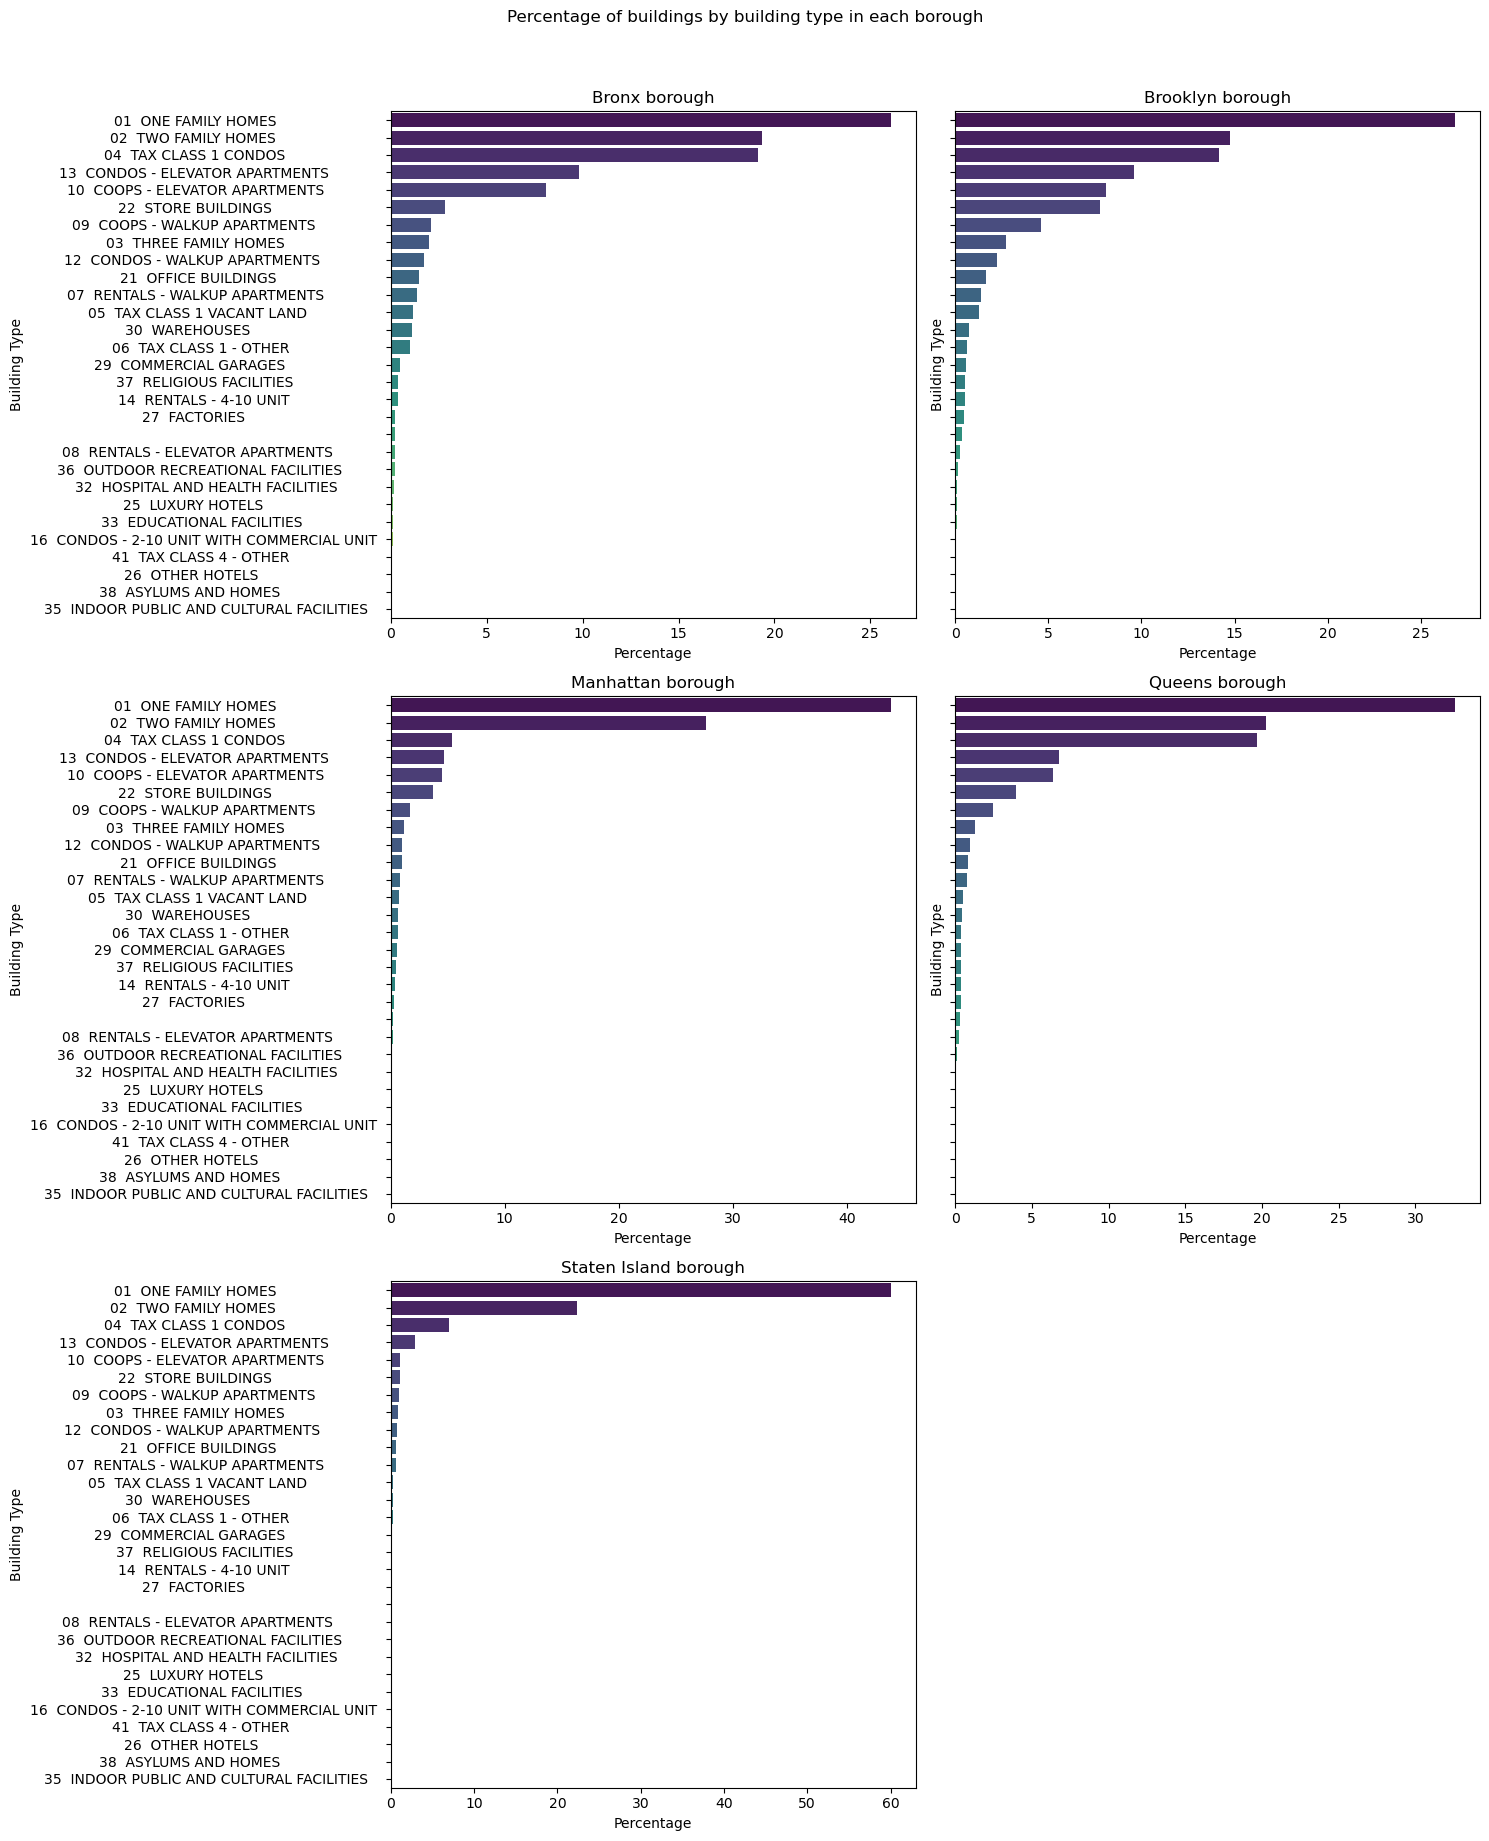

In [21]:
boroughs = df['BOROUGH_NAME'].unique()

num_rows = len(boroughs) // 2 + len(boroughs) % 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows), sharey=True)
axes = axes.flatten()

for i, borough in enumerate(boroughs):
    df_borough = df[df['BOROUGH_NAME'] == borough]
    building_type_percentage = df_borough['BUILDING CLASS CATEGORY'].value_counts(normalize=True) * 100
    
    sns.barplot(x=building_type_percentage.values, y=building_type_percentage.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{borough} borough')
    axes[i].set_xlabel('Percentage')
    axes[i].set_ylabel('Building Type')

if len(boroughs) % 2 != 0:
    fig.delaxes(axes[-1])

plt.suptitle('Percentage of buildings by building type in each borough', y=1.02)
plt.tight_layout()
plt.show()